## 1. Medical Maliyet Analizi

## 2. Gerekli kütüphanelerin dahil edilmesi.

In [13]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [14]:
# insurance dataları import edildi.
df_insurance = pd.read_csv("insurance.csv")

## 3. Keşifsel Veri Analizi

In [15]:
# Bakalım içeride neler var?
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# Data frame içerisinde null değer var mı toplamlarını inceleyelim.
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3.1. BMI(Vucüt kitle indeksi)'nin dağılımının incelenmesi

| Category | Scala |
|---|---|
| Underweight | < 18.5 |
| Normal | 18.5 - 24.9 |
| Overweight | 25 - 29.9 |
| Obese | 30 - 34.9 |
| Extremly Obese | > 35 |

Yukarıdaki tabloya göre kadın ve erkeklerdeki BMI dağılımını gösterirsek.

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


[Text(0.5, 1.0, 'bmi distribution')]

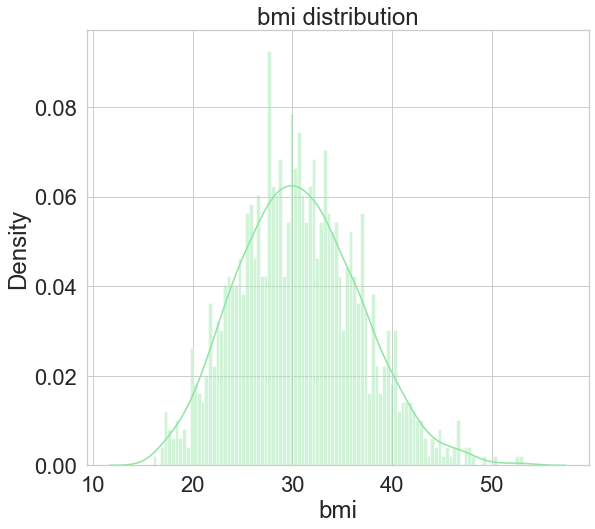

In [17]:
print(df_insurance['bmi'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_insurance['bmi'], color='g', bins=100).set(title='bmi distribution')

In [18]:

bmi_underweight = (df_insurance["bmi"] < 18.5).sum()
print("BMI Underweight Count:", bmi_underweight)

bmi_normal = ((18.5 < df_insurance["bmi"]) & (df_insurance["bmi"] < 24.9)).sum()

print("BMI Normal Count: ", bmi_normal)

bmi_overweight = ((25 <= df_insurance["bmi"]) & (df_insurance["bmi"] < 29.9)).sum()
print("BMI Overweight Count: ", bmi_overweight)

bmi_obese = ((30 <= df_insurance["bmi"]) & (df_insurance["bmi"] < 34.9)).sum()
print("BMI Obese Count: ", bmi_obese)

bmi_extremly_obese = ((35 <= df_insurance["bmi"])).sum()
print("BMI Extremly Obese Count: ", bmi_extremly_obese)

# Dataları bu şekilde tanımlayabiliriz.
bmi_key = ["Underweight", "Normal", "Overweight", "Obese", "Extremly Obese"]
bmi_counts = [bmi_underweight, bmi_normal, bmi_overweight, bmi_obese, bmi_extremly_obese]

print()

print("BMI Key: ", bmi_key)
print("BMI Counts: ", bmi_counts)

# Ve ya data frame olarak da tanımlayabiliriz.
bmi_data = pd.DataFrame({
    "Underweight": [bmi_underweight],
    "Normal": [bmi_normal],
    "Overweight": [bmi_overweight],
    "Obese": [bmi_obese],
    "Extremly Obese": [bmi_extremly_obese],
    })

print()

print(bmi_data)

BMI Underweight Count: 20
BMI Normal Count:  221
BMI Overweight Count:  374
BMI Obese Count:  387
BMI Extremly Obese Count:  316

BMI Key:  ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremly Obese']
BMI Counts:  [20, 221, 374, 387, 316]

   Underweight  Normal  Overweight  Obese  Extremly Obese
0           20     221         374    387             316


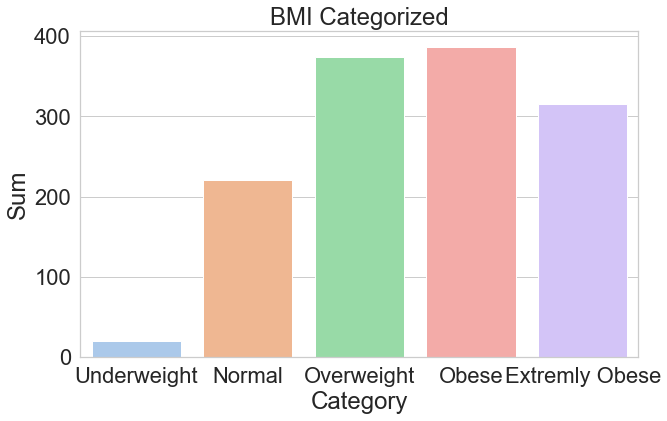

In [19]:

plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid", palette="pastel", font_scale=2)

p = sns.barplot(data = bmi_data)
p.set_xlabel("Category")
p.set_ylabel("Sum")
p.set_title("BMI Categorized")

plt.show()


In [20]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df_insurance['smoker'] = label_encoder.fit_transform(df_insurance['smoker']) 
df_insurance['region']=label_encoder.fit_transform(df_insurance['region'])
df_insurance['sex']=label_encoder.fit_transform(df_insurance['sex'])

In [21]:
df_insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

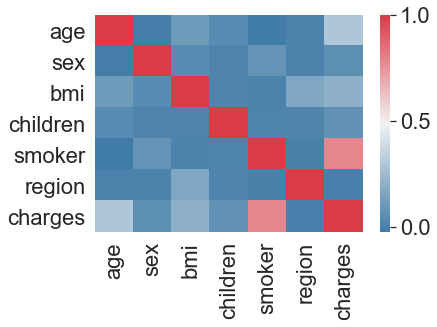

In [22]:
sns.heatmap(df_insurance.corr(),cmap=sns.diverging_palette(240,10,as_cmap=True))

### 3.2. "smoker" ile "charges" arasındaki ilişkinin incelenmesi

### 3.3. "smoker" (Sigara tüketen) ile "region" (Bölge) arasındaki ilişkinin incelenmesi

### 3.4. "bmi" ile "sex" (Cinsiyet) arasındaki ilişkinin incelenmesi

### 3.5. En çok "children"'a sahip "region"

### 3.6. "Age" ile "bmi" arasındaki ilişkinin incelenmesi

### 3.7. "bmi" ile "children" arasındaki ilişkinin incelenmesi

### 3.8. "bmi" değişkeninde outlier var mıdır?

### 3.9. "bmi" ile "charges" arasındaki ilişkinin incelenmesi

### 3.10. "region", "smoker" ve "bmi" arasındaki ilişkinin bar plot kullanarak incelenmesi

## 4. Veri Ön İşleme

## 5. Model Seçme

## 6. Hiper-parametre Optimizasyonu

## 7. Modeli Değerlendirme